# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(font_scale=1.2, palette='Set2')
from IPython.display import clear_output

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
# import numpy as np
# import graphviz
# import pydotplus

# # задаем входные и выходные данные
# inputs = np.array([1, 2, 3])
# outputs = np.array([0.2, 0.4])

# # создаем граф
# graph = pydotplus.Dot(graph_type='digraph')

# # добавляем узлы
# input_node = pydotplus.Node(str(inputs), label="Input\nLayer")
# hidden_node = pydotplus.Node("Hidden\nLayer")
# output_node = pydotplus.Node(str(outputs), label="Output\nLayer")

# # добавляем ребра и веса
# input_hidden_edge = pydotplus.Edge(input_node, hidden_node, label=str(np.random.rand(3, 4)))
# hidden_output_edge = pydotplus.Edge(hidden_node, output_node, label=str(np.random.rand(4, 2)))

# # добавляем все элементы в граф
# graph.add_node(input_node)
# graph.add_node(hidden_node)
# graph.add_node(output_node)
# graph.add_edge(input_hidden_edge)
# graph.add_edge(hidden_output_edge)

# # сохраняем граф в PDF
# # 

# # отображаем граф
# graphviz.Source(graph.to_string())


Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

**Исправлено:** обучаемых параметров суммарно 7. Рисунок прикреплялся в боте при прошлой отправке, по нему вопросов не было.

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**Распишем подробнее** $\widehat{y}(x)$, подставляя функцию $\sigma$:

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}  \sigma(w_{1h}x + b_{1h}) + b_2$$

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h} \frac{1}{1 + \exp(-w_{1h}x - b_{1h})}  + b_2$$

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{1}{n}(-2Y_i + 2\widehat{y}(X_i)\big).$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i);$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1 ;$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} =  w_{2h};$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x) (1 - \sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{e^{-w_{1h}X_i - b_{1h}}X_i}{(1 + e^{-w_{1h}X_i - b_{1h}})^2}$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{e^{-w_{1h}X_i - b_{1h}}}{(1 + e^{-w_{1h}X_i - b_{1h}})^2}$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial  u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial  u_h(X_i)} \frac{\partial  u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

**Ответ:** На большой выборке слишком большими становятся все значения производных MSE по параметрам. Следовательно, т.к. с помощью них мы обновляем параметры, то и они становятся большими. Из-за этого значение функции активации, а, следовательно, и $\widehat y$ обнуляется. Чтобы этого не происходило, можно **разбить выборку на батчи**, и считать веса по случайным подвыборкам исходного датасета. 

**Вывод:**

Из полученных производных видно, почему метод обучения называется backward: шаг градиента самых первых слоев рассчитывается на основе уже вычисленных градиентов последних нейронов. В случае с большим количеством нейронов это значительно ускоряет обучение.

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [ ]:
def show_progress(x, y, y_pred, y_linear, loss_ai, loss_lin):

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, label='Истинные данные')
    plt.scatter(x, y_pred, color='green', label='Нейросеть')
    plt.scatter(x, y_linear, color='orange', label='Линейная регрессия')

    plt.xlabel('Значения по X')
    plt.title('Сравнение исходных значений и предсказаний на тестовых данных')
    plt.legend()
    plt.show()

    print(f"MSE нейросети = {loss_ai:.3f}", f"MSE линейной модели = {loss_lin:.3f}")

Заранее прошу прощения за кодстайл в следующей ячейке: я осознаю, что можно сделать элегантнее и более емко, такие навыки у меня есть. Но главной задачей на этой работе для меня было заставить работать этот код качественно и правильно, обернуть его в функции и векторы я не успеваю. Спасибо за понимание!

**Исправил:** добавил документацию к функциям в классе.

In [ ]:
class Network:

    """
    Класс реализующий нейронную сеть.

    Parameters:
        lambd (float): Коэффициент регуляризации (по умолчанию 0.1).
        fit_intercept (bool): Определяет необходимость использования свободного члена (по умолчанию True).
        num_iter (int): Количество итераций обучения (по умолчанию 1000).
        step (float): Скорость обучения (по умолчанию 0.001).
        batch_size (int): Размер батча (по умолчанию 1000).
    """

  # Инициализация в классе
  w1_1 = 0
  w1_2 = 0

  w2_1 = 0
  w2_2 = 0

  b1_1 = 0
  b1_2 = 0

  b2 = 0

  step = 0
  num_iter = 0
  batch_size = 0
  loss = 0

  def __init__(self, lambd=0.1, fit_intercept=True, num_iter=1000, step=0.001, batch_size=1000):
      
      '''
      Инициализация модели.
      '''
      
      # Инициализация весов
      
      self.w1_1 = 1
      self.w1_2 = 1
      
      self.w2_1 = 1
      self.w2_2 = 1

      self.b1_1 = 1
      self.b1_2 = 1

      self.b2 = 1

      # Количество итераций
      self.num_iter = num_iter

      # Скорость обучения для параметров
      self.step = step
      self.batch_size = batch_size
  
  # Функция активации
  def sigmoid(self, x):
        """
        Функция активации - сигмоида.

        Args:
            x (array-like): Входные данные.

        Returns:
            array-like: Результат применения сигмоиды к входным данным.
        """
      return 1/(1 + np.exp(-x))

  # Производная функции активации
  def d_sigm(self, x):
      """
      Производная функции активации - сигмоида.

      Args:
          x (array-like): Входные данные.

      Returns:
          array-like: Результат вычисления производной сигмоиды по входным данным.
      """
      return (np.exp(x))/(pow((1 + np.exp(x)), 2))

  # Подсчет MSE
  def mse(self, y_pred, y_true):
      return np.mean(pow((y_pred - y_true), 2))

  # Создание подвыборки - батча
  def shuffling(self, X, Y, batch_size):
      """
      Создание подвыборки (батча).

      Args:
          X (array-like): Матрица признаков.
          Y (array-like): Вектор целевых значений.
          batch_size (int): Размер батча.

      Returns:
          tuple: Кортеж, содержащий подвыборку признаков и соответствующие им целевые значения.
      """
      arr_tuple = (X, Y)
      shuffled_indices = np.random.permutation(len(arr_tuple[0]))
      subset_tuple = tuple()

      for arr in arr_tuple:
          random_subset = arr[shuffled_indices[:batch_size]]

          subset_tuple += (random_subset,)
      return subset_tuple

  # Обучение модели      
  def fit(self, x, y_real):

      weights_list = [self.w1_1, self.w1_2, self.w2_1, self.w2_2, self.b1_1, self.b1_2, self.b2]

      for iter in range(self.num_iter):
          # Батчи
          part_x, part_y = self.shuffling(x, y_real, self.batch_size)

          # Считаем предсказание
          prep_x_1 = self.w1_1*part_x + self.b1_1
          prep_x_2 = self.w1_2*part_x + self.b1_2
          u_1 = self.sigmoid(prep_x_1)
          u_2 = self.sigmoid(prep_x_2)

          y_pred =  (self.w2_1*u_1 + self.w2_2*u_2 + self.b2)
          y_pred = y_pred.reshape((len(y_pred), 1))

          # Считаем loss
          loss = self.mse(y_pred, part_y)

          # Считаем градиенты
          se = (2/len(y_pred)) * (y_pred - part_y)

          dw2_1 = np.sum(se*u_1)
          dw2_2 = np.sum(se*u_2)

          db2 = np.sum(se)

          dw1_1 = np.sum(self.w2_1 * se) * np.sum( self.d_sigm(-self.w1_1*part_x - self.b1_1)*part_x)
          dw1_2 = np.sum(self.w2_2 * se) * np.sum(self.d_sigm(-self.w1_2*part_x - self.b1_2)*part_x)
          db1_1 = np.sum(self.w2_1 * se) * np.sum( self.d_sigm(-self.w1_1*part_x - self.b1_1))
          db1_2 = np.sum(self.w2_2 * se) * np.sum(self.d_sigm(-self.w1_2*part_x - self.b1_2))

          self.w1_1 -= self.step * dw1_1
          self.w1_2 -= self.step * dw1_2
          
          self.w2_1 -= self.step * dw2_1
          self.w2_2 -= self.step * dw2_2

          self.b1_1 -= self.step * db1_1
          self.b1_2 -= self.step * db1_2

          self.b2 -= self.step * db2

      return self      
  
  # Применение модели
  def predict(self, X, y):

      prep_x_1 = self.w1_1*X + self.b1_1
      prep_x_2 = self.w1_2*X + self.b1_2
      u_1 = self.sigmoid(prep_x_1)
      u_2 = self.sigmoid(prep_x_2)

      y_pred =  self.w2_1*u_1 + self.w2_2*u_2 + self.b2
      self.loss = self.mse(y_pred, y)
      return y_pred

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$, например $y = \exp{x}$

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.exp(X)
print(y.shape)
assert y.shape == (sample_size, 1)

(1000000, 1)


Разделим выборку на тренировочную и тестовую части

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

Обучим собственную реализацию нейронной сети

In [ ]:
model = Network()
Network.__init__(model, num_iter=2500, step=0.1, batch_size=50)

model = Network.fit(model, X_train, y_train)

Обучим линейную регрессию из sklearn

In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

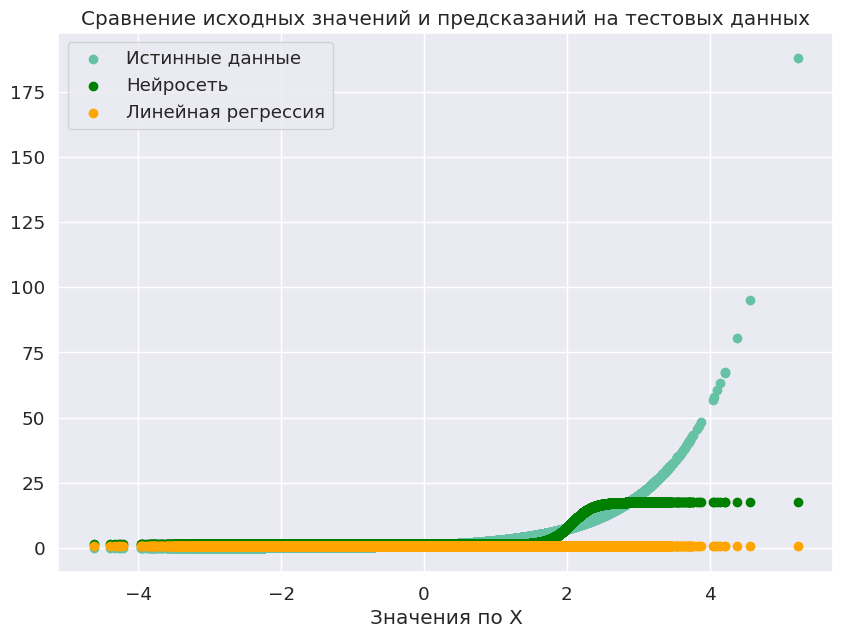

MSE нейросети = 1.786 MSE линейной модели = 5.855


In [ ]:
y_ai = model.predict(X_test, y_test)
y_linear = linear_model.predict(X_test)
show_progress(X_test, y_test, y_ai, y_linear, model.loss, metrics.mean_squared_error(y_test, y_linear))

Повторите вычисления для другой нелинейной функции $y(x)$. Пусть  $y = \cos{x}$

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.cos(X)
print(y.shape)
assert y.shape == (sample_size, 1)

(1000000, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим собственную реализацию нейронной сети

In [ ]:
model = Network()
Network.__init__(model, num_iter=2000, step=0.1, batch_size=34)

model = Network.fit(model, X_train, y_train)

Обучим линейную регрессию из sklearn

In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression()

Визуализируем предсказания данных моделей и посчитаем MSE на тестовой части данных.

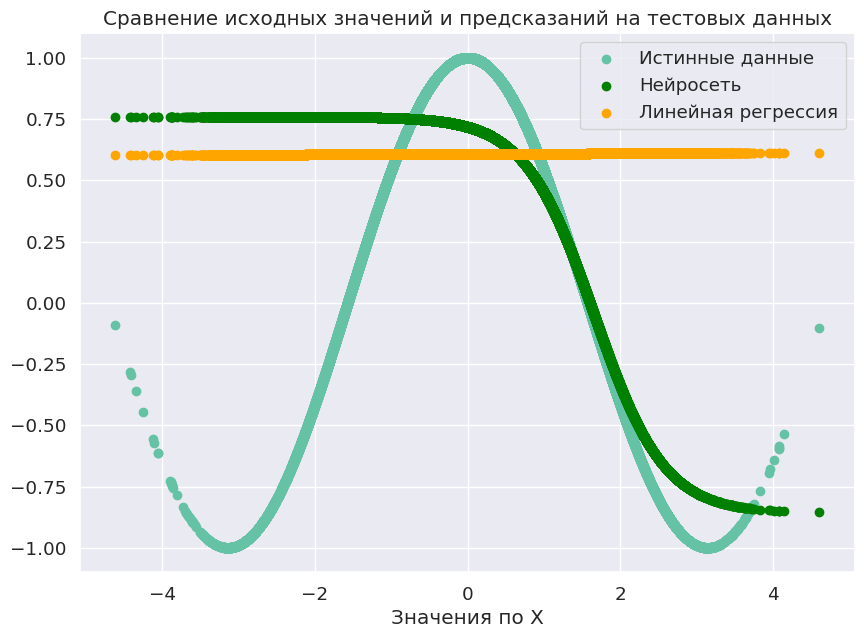

MSE нейросети = 0.133 MSE линейной модели = 0.199


In [ ]:
y_ai = model.predict(X_test, y_test)
y_linear = linear_model.predict(X_test)
show_progress(X_test, y_test, y_ai, y_linear, model.loss, metrics.mean_squared_error(y_test, y_linear))

**Вывод:**
Видно, что самодельная нейросеть справляется лучше, чем линейная регрессия. Но с огромным количеством "Но": хорошие результаты получаются на экспоненциальных функциях, на остальных она по качеству так же/хуже, чем линейная регрессия. Интересный хвост наблюдается в первом случае, непонятно, почему так изгибается график (скорее всего, специфика функции активации). Нейросеть очень чувствительна к размеру батча, скорости обучения. Однако, на мой взгляд, это издержки метода оптимизации - градиентного спуска. Можно сделать его качественнее, быстрее и точнее. Результаты будут лучше, что мы и наблюдаем в реализации нейросети от pytorch.

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$, например $y = \exp{x}$

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.cos(X)
print(y.shape)
assert y.shape == (sample_size, 1)

(1000000, 1)


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
# собираем модули в последовательность
model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1), 
    # та же ф-ция активации, что и раньше, только из pytorch 
    nn.ReLU(),  
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1)  
)

In [ ]:
X = torch.FloatTensor(X[:, -1] / 10)
y = torch.FloatTensor(y)

x_new = X.reshape(-1, 1)
y_new = y.reshape(-1, 1)

print(model(x_new)[:10])


tensor([[3.0450],
        [1.7408],
        [2.6522],
        [1.6760],
        [0.3594],
        [0.8644],
        [2.5145],
        [3.2094],
        [0.3594],
        [0.6490]], grad_fn=<SliceBackward0>)


In [ ]:
for p in model.parameters():
    p.data = torch.FloatTensor([[1]])

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

In [ ]:
# Количество итераций
num_iter = 1000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # # График + вывод MSE через каждые 5 итераций
    # if (i + 1) % 5 == 0:
    #     show_progress(x, y, y_pred, loss)

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

In [ ]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_new, y_new)

LinearRegression()

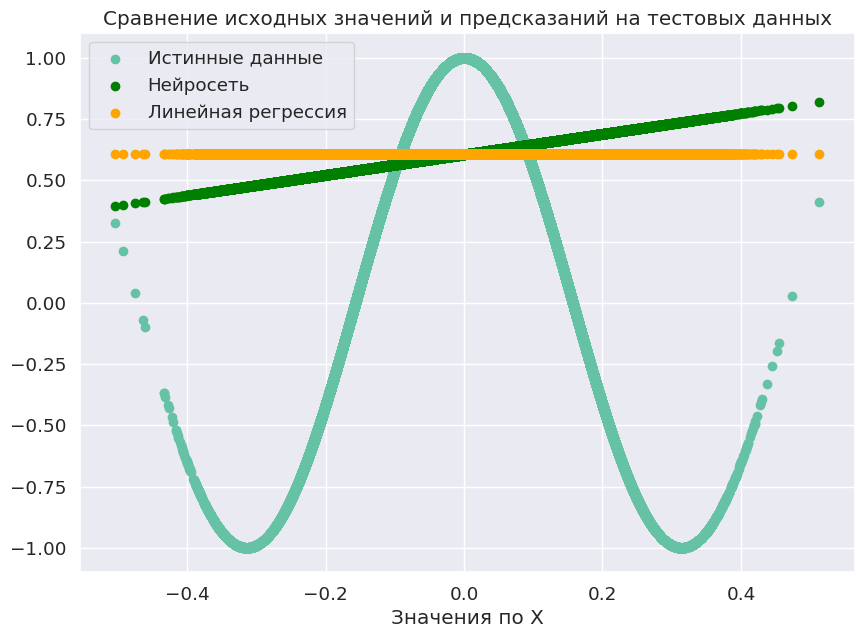

MSE нейросети = 0.202 MSE линейной модели = 0.200


In [ ]:
y_ai = model(x_new)
y_ai = y_pred.detach()

y_linear = linear_model.predict(x_new)
show_progress(x_new, y_new, y_ai, y_linear, optim_func(y_pred, y_new), 
              metrics.mean_squared_error(y_new, y_linear))

**Вывод:**
Возможно, не получилось грамотно настроить pytorch, надеюсь, в будущем на DS потоке получится изучить эту библиотеку качественнее! Спасибо за курс!